In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model

In [21]:
# Inputs tensor of size 8
inputs = keras.Input(shape=(8,), name='image')

In [22]:
# Add a Dense layer with 12 nodes
x = layers.Dense(12, activation='relu')(inputs)

In [23]:
# Add one more layer having 8 nodes
x = layers.Dense(8, activation='relu')(x)

In [25]:
# add the output layer to our network
outputs = layers.Dense(5)(x)

The model can now be defined by using these inputs and outputs as shown in the following statement:

In [29]:
model = Model(inputs=inputs, outputs=outputs, name='multilayer model')

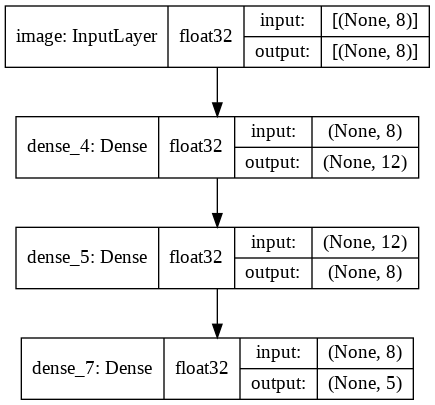

In [35]:
keras.utils.plot_model(model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

---

**Model Subclassing**

In [36]:
class MyModel(tf.keras.Model):
  def __init__(self, use_dp = False, num_output = 1):
    super(MyModel, self).__init__()
    self.use_dp = use_dp
    self.dense1 = tf.keras.layers.Dense(12, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(24, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense4 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
    if self.use_dp:
      use_dp = tf.keras.layers.Dropout(0.3)

  def call(self, x):
    x = self.dense1(x)
    x = self.dense2(x)
    if self.use_dp:
      x = self.dp(x)
    x = self.dense3(x)
    if self.use_dp:
      x = self.dp(x)
    return self.dense4(x)

In [39]:
model = MyModel()

In [42]:
model.compile(loss = tf.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

---

**Custom Layers**

In [50]:
class MyLayer(tf.keras.layers.Layer):
  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim
    super(MyLayer, self).__init__( **kwargs)

  def build(self, input_shape):
    self.W = self.add_weight(name = 'kernel', 
                             shape = (input_shape[1], self.output_dim), 
                             initializer = 'uniform', 
                             trainable = True)
    self.built = True

  def call(self, x):
    return tf.matmul(x, self.W)

  def compute_output_shape(self, input_shape):
    return (input_shape[0], self.output_dim)


Now use this custom layer in any network configuration:

In [51]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(256, input_shape=(784,)),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                            #  tf.keras.layers.Dense(10),
                              MyLayer(10),
                             tf.keras.layers.Dense(10, activation = 'softmax')]
                            )

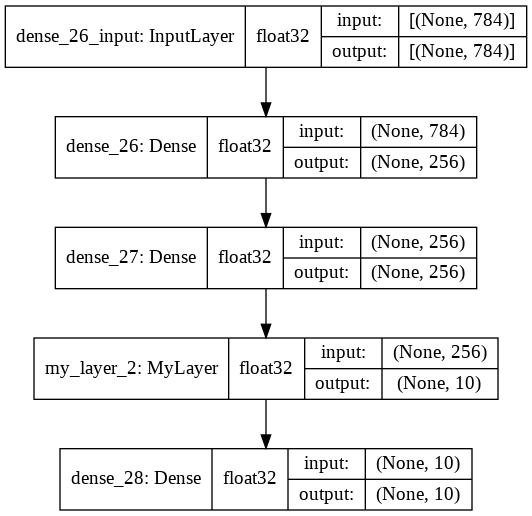

In [52]:
keras.utils.plot_model(model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [53]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [55]:
# model.fit(x,y1, batch_size=32, epochs=30)

---